In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [2]:
flight_delay_data=pd.read_csv('data/Train.csv')

In [3]:
flight_delay_data.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0


In [4]:
flight_delay_data.describe()

,target
count,107833.000000
mean,48.733013
std,117.135562
min,0.000000
25%,0.000000
50%,14.000000
75%,43.000000
max,3451.000000


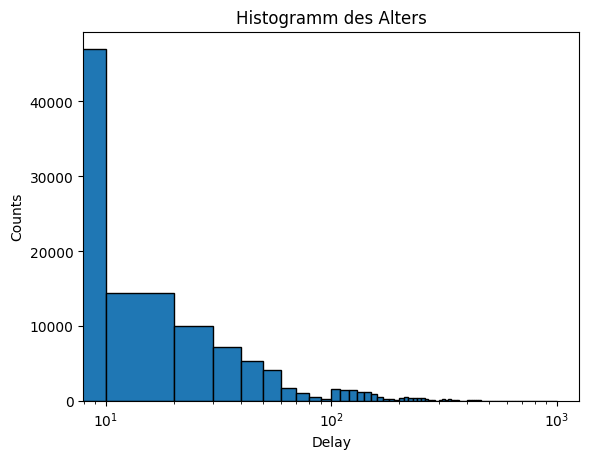

In [53]:
import pandas as pd
import matplotlib.pyplot as plt


# Histogramm erstellen
bins = range(0, 1001, 10)
plt.hist(flight_delay_data['target'], bins=bins, edgecolor='black')

# X-Achse logarithmisch machen
plt.xscale('log')

# Diagramm beschriften
plt.xlabel('Delay')
plt.ylabel('Counts')
plt.title('Histogramm des Alters')

# Diagramm anzeigen
plt.show()


In [33]:
unique_statuses = flight_delay_data['STATUS'].unique()
unique_statuses

array(['ATA', 'DEP', 'RTR', 'SCH', 'DEL'], dtype=object)

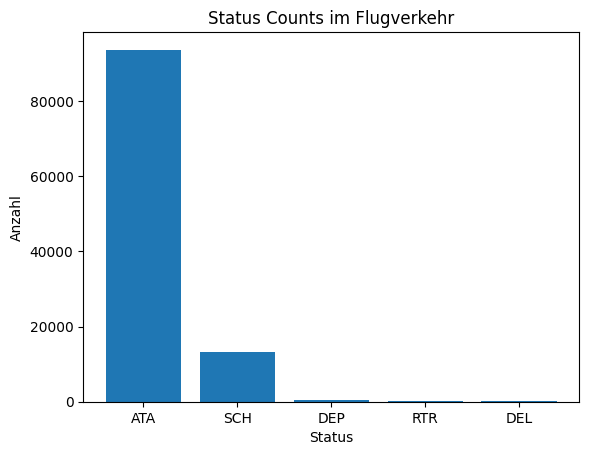

In [54]:
status_counts = flight_delay_data['STATUS'].value_counts()

# Balkendiagramm erstellen
plt.bar(status_counts.index, status_counts.values)

# Diagramm beschriften
plt.xlabel('Status')
plt.ylabel('Anzahl')
plt.title('Status Counts im Flugverkehr')

# Diagramm anzeigen
plt.show()

In [36]:
status_counts

STATUS
ATA    93679
SCH    13242
DEP      467
RTR      294
DEL      151
Name: count, dtype: int64

In [55]:
unique_departure = flight_delay_data['DEPSTN'].unique()
unique_arrival = flight_delay_data['ARRSTN'].unique()


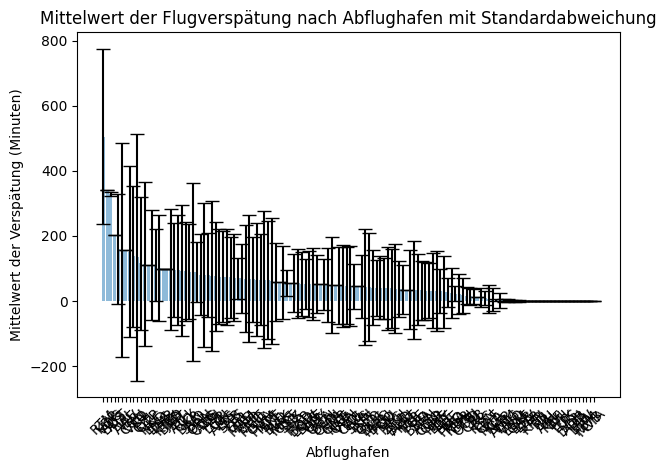

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt






# Eindeutige Abflughäfen erhalten
unique_departure = flight_delay_data['DEPSTN'].unique()

# Liste für die Mittelwerte und Standardabweichungen vorbereiten
means = []
std_devs = []

# Für jeden Abflughafen den Mittelwert und die Standardabweichung berechnen
for dep in unique_departure:
    delay_values = flight_delay_data.loc[flight_delay_data['DEPSTN'] == dep, 'target']
    mean = np.mean(delay_values)
    std_dev = np.std(delay_values)
    means.append(mean)
    std_devs.append(std_dev)


# Sortiere die Abflughäfen nach dem größten Mittelwert der Verspätung
sorted_indices = np.argsort(means)[::-1]
sorted_means = np.array(means)[sorted_indices]
sorted_std_devs = np.array(std_devs)[sorted_indices]
sorted_departure = unique_departure[sorted_indices]


# Balkendiagramm erstellen
#plt.bar(unique_departure, means, yerr=std_devs, align='center', alpha=0.5, capsize=5)
#plt.bar(unique_departure, means, align='center', alpha=0.5, capsize=5)
plt.bar(sorted_departure, sorted_means, yerr=sorted_std_devs, align='center', alpha=0.5, capsize=5)

# Diagramm beschriften
plt.xlabel('Abflughafen')
plt.ylabel('Mittelwert der Verspätung (Minuten)')
plt.title('Mittelwert der Flugverspätung nach Abflughafen mit Standardabweichung')
plt.xticks(rotation=45)

# Diagramm anzeigen
plt.tight_layout()
plt.show()



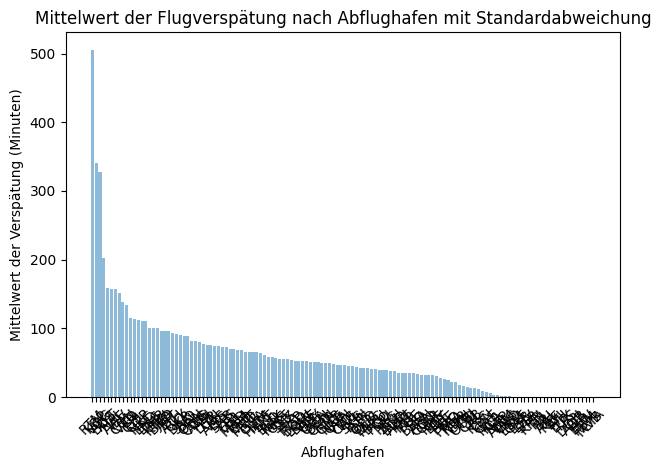

In [6]:
plt.bar(sorted_departure, sorted_means, align='center', alpha=0.5, capsize=5)

# Diagramm beschriften
plt.xlabel('Abflughafen')
plt.ylabel('Mittelwert der Verspätung (Minuten)')
plt.title('Mittelwert der Flugverspätung nach Abflughafen mit Standardabweichung')
plt.xticks(rotation=45)

# Diagramm anzeigen
plt.tight_layout()
plt.show()

In [63]:
sorted_departure

array(['RTM', 'KBP', 'VOG', 'BDS', 'AYT', 'HAJ', 'AAE', 'IEV', 'CGN',
       'VKO', 'LIL', 'CZL', 'OTP', 'NKC', 'LAD', 'DSS', 'TMR', 'KTW',
       'BKO', 'JED', 'IST', 'ATH', 'CKY', 'DKR', 'SVO', 'BLL', 'ORN',
       'CDG', 'ALG', 'ABJ', 'LHR', 'CAI', 'AMS', 'LYS', 'SXB', 'TLS',
       'EBL', 'MAD', 'NIM', 'LED', 'MED', 'VIE', 'OUA', 'HAM', 'NTE',
       'SXF', 'BLQ', 'RAK', 'MRS', 'OST', 'SKX', 'LIS', 'MXP', 'BOD',
       'LGW', 'BEG', 'VCE', 'ORY', 'GHA', 'BCN', 'CMN', 'FRA', 'GNB',
       'NCE', 'GVA', 'VRN', 'CAG', 'YUL', 'SKG', 'TUN', 'BTS', 'OPO',
       'DUS', 'MUC', 'BRU', 'FCO', 'LJU', 'PRG', 'ZRH', 'BUD', 'AHU',
       'KRT', 'MIR', 'TOE', 'BRQ', 'SFA', 'ARN', 'COO', 'OSR', 'NBE',
       'BEY', 'DJE', 'HBE', 'PMO', 'PSA', 'NDR', 'CPH', 'OUD', 'TBJ',
       'CRL', 'JIB', 'KSC', 'TRN', 'GAE', 'MLA', 'KGL', 'NAP', 'AMM',
       'TNG', 'VNO', 'EBM', 'GAF', 'ESB', 'LBV', 'STR', 'KRR', 'SJJ',
       'TLL', 'BRI', 'AAL', 'KEF', 'BYJ', 'FIH', 'LUX', 'TPS', 'DOH',
       'ADB', 'BJA',

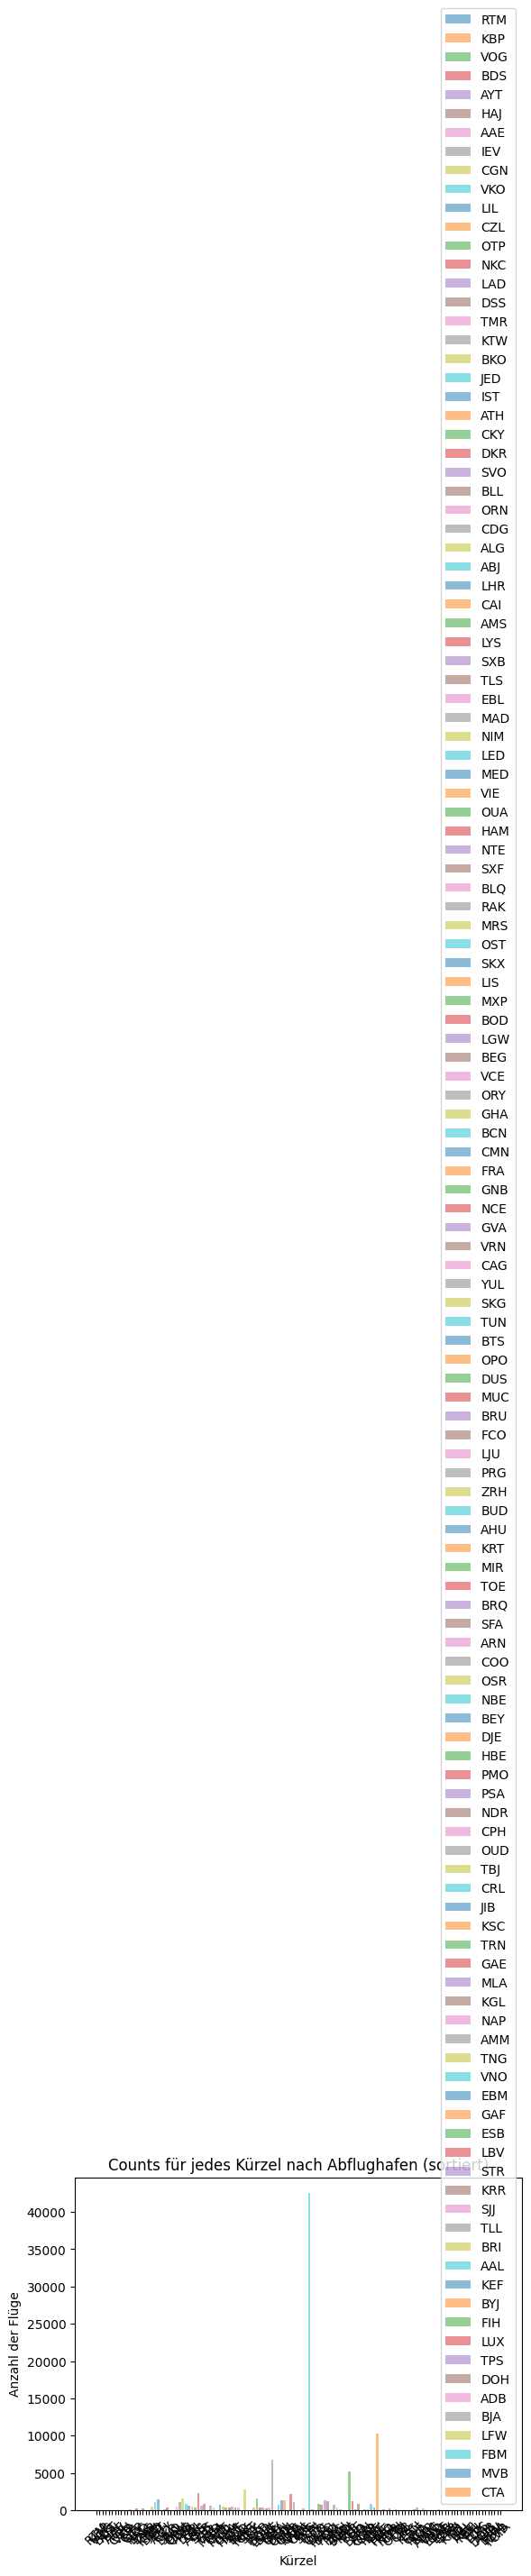

In [64]:
for dep in sorted_departure:
    counts = flight_delay_data[flight_delay_data['DEPSTN'] == dep]['DEPSTN'].value_counts()
    plt.bar(counts.index, counts.values, align='center', alpha=0.5, label=dep)

plt.xlabel('Kürzel')
plt.ylabel('Anzahl der Flüge')
plt.title('Counts für jedes Kürzel nach Abflughafen (sortiert)')
plt.legend()
plt.xticks(rotation=45)

# Diagramm anzeigen
plt.tight_layout()
plt.show()

In [7]:
# Create a copy of the DataFrame
flight_delay_data_above_15min = flight_delay_data.copy()


In [8]:
flight_delay_data_above_15min  = flight_delay_data_above_15min [flight_delay_data_above_15min ['target'] >= 15]

In [9]:
flight_delay_data_above_15min.describe()

,target
count,53009.000000
mean,96.360146
std,153.068261
min,15.000000
25%,25.000000
50%,44.000000
75%,115.000000
max,3451.000000


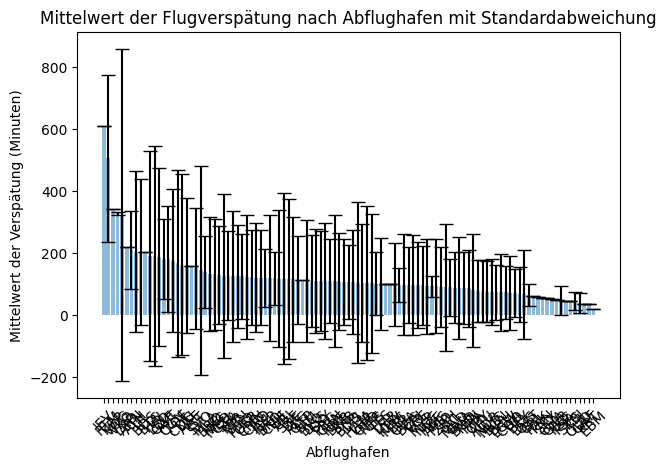

In [10]:







# Eindeutige Abflughäfen erhalten
unique_departure = flight_delay_data_above_15min['DEPSTN'].unique()

# Liste für die Mittelwerte und Standardabweichungen vorbereiten
means = []
std_devs = []

# Für jeden Abflughafen den Mittelwert und die Standardabweichung berechnen
for dep in unique_departure:
    delay_values = flight_delay_data_above_15min.loc[flight_delay_data_above_15min['DEPSTN'] == dep, 'target']
    mean = np.mean(delay_values)
    std_dev = np.std(delay_values)
    means.append(mean)
    std_devs.append(std_dev)


# Sortiere die Abflughäfen nach dem größten Mittelwert der Verspätung
sorted_indices = np.argsort(means)[::-1]
sorted_means = np.array(means)[sorted_indices]
sorted_std_devs = np.array(std_devs)[sorted_indices]
sorted_departure = unique_departure[sorted_indices]


# Balkendiagramm erstellen
#plt.bar(unique_departure, means, yerr=std_devs, align='center', alpha=0.5, capsize=5)
#plt.bar(unique_departure, means, align='center', alpha=0.5, capsize=5)
plt.bar(sorted_departure, sorted_means, yerr=sorted_std_devs, align='center', alpha=0.5, capsize=5)

# Diagramm beschriften
plt.xlabel('Abflughafen')
plt.ylabel('Mittelwert der Verspätung (Minuten)')
plt.title('Mittelwert der Flugverspätung nach Abflughafen mit Standardabweichung')
plt.xticks(rotation=45)

# Diagramm anzeigen
plt.tight_layout()
plt.show()


Feature engineering

In [11]:
flight_delay_data_above_15min_featureEngineering = flight_delay_data_above_15min.copy()

In [14]:
flight_delay_data_above_15min_featureEngineering.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,Date,Month,Year,Hour
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0,2016-01-03 10:30:00,1,2016,10
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0,2016-01-13 15:05:00,1,2016,15
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0,2016-01-17 14:30:00,1,2016,14
5,train_id_5,2016-01-17,TU 0283,TLS,TUN,2016-01-17 16:20:00,2016-01-17 18.15.00,ATA,TU 736IOP,53.0,2016-01-17 16:20:00,1,2016,16
7,train_id_7,2016-01-18,TU 0716,TUN,ORY,2016-01-18 07:35:00,2016-01-18 09.55.00,ATA,TU 32AIMI,15.0,2016-01-18 07:35:00,1,2016,7


In [13]:
flight_delay_data_above_15min_featureEngineering['Date'] = pd.to_datetime(flight_delay_data_above_15min_featureEngineering['STD'])

# Spalten für Monat, Jahr und Stunde hinzufügen
flight_delay_data_above_15min_featureEngineering['Month'] = flight_delay_data_above_15min_featureEngineering['Date'].dt.month
flight_delay_data_above_15min_featureEngineering['Year'] = flight_delay_data_above_15min_featureEngineering['Date'].dt.year
flight_delay_data_above_15min_featureEngineering['Hour'] = flight_delay_data_above_15min_featureEngineering['Date'].dt.hour


Time Correlation?

In [19]:
import seaborn as sns

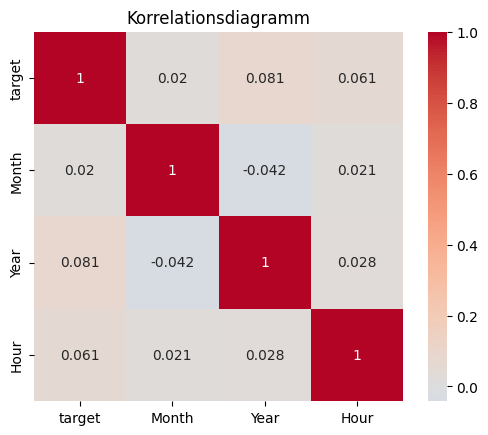

In [20]:
test_data_time = flight_delay_data_above_15min_featureEngineering.copy()
test_data_time = test_data_time[['target', 'Month', 'Year', 'Hour']]
# Korrelationsmatrix berechnen
correlation_matrix = test_data_time.corr()
# Korrelationsdiagramm (Heatmap) erstellen
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True)

# Diagramm anzeigen
plt.title('Korrelationsdiagramm')
plt.show()

Status correlation? time inclusive

In [23]:
flight_delay_data_above_15min_featureEngineering.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,Date,Month,Year,Hour
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0,2016-01-03 10:30:00,1,2016,10
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0,2016-01-13 15:05:00,1,2016,15
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0,2016-01-17 14:30:00,1,2016,14
5,train_id_5,2016-01-17,TU 0283,TLS,TUN,2016-01-17 16:20:00,2016-01-17 18.15.00,ATA,TU 736IOP,53.0,2016-01-17 16:20:00,1,2016,16
7,train_id_7,2016-01-18,TU 0716,TUN,ORY,2016-01-18 07:35:00,2016-01-18 09.55.00,ATA,TU 32AIMI,15.0,2016-01-18 07:35:00,1,2016,7


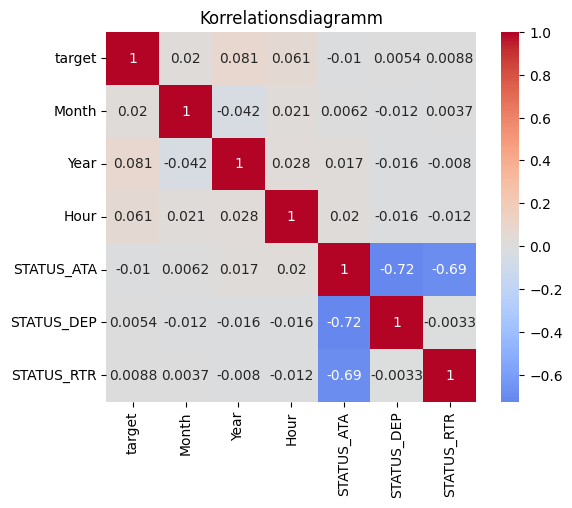

In [26]:
test_data_status = flight_delay_data_above_15min_featureEngineering.copy()
test_data_status = flight_delay_data_above_15min_featureEngineering[['STATUS','target', 'Month', 'Year', 'Hour']]

# Dummy-Variablen erstellen und im DataFrame verbleiben lassen
dummy_matrix = pd.get_dummies(test_data_status['STATUS'], prefix='STATUS')
test_data_status  = pd.concat([test_data_status, dummy_matrix], axis=1)

test_data_status = test_data_status.drop('STATUS', axis=1)

# Korrelationsmatrix berechnen
correlation_matrix = test_data_status .corr()
# Korrelationsdiagramm (Heatmap) erstellen
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True)

# Diagramm anzeigen
plt.title('Korrelationsdiagramm')
plt.show()

Correlation time + flight number(AC) ??

In [35]:
test_data_flightnumber = flight_delay_data_above_15min_featureEngineering.copy()
test_data_flightnumber = flight_delay_data_above_15min_featureEngineering[['target','AC', 'Month', 'Year', 'Hour']]

# Dummy-Variablen erstellen und im DataFrame verbleiben lassen
dummy_matrix = pd.get_dummies(test_data_flightnumber['AC'], prefix='AC')
test_data_flightnumber = pd.concat([test_data_flightnumber, dummy_matrix], axis=1)

test_data_flightnumber = test_data_flightnumber.drop('AC', axis=1)

# Korrelationsmatrix berechnen
correlation_matrix = test_data_flightnumber .corr()
# Korrelationsdiagramm (Heatmap) erstellen
# Extract the row of the correlation matrix corresponding to "target"
target_correlations = correlation_matrix.loc['target']
#selected_columns = target_correlations.columns[target_correlations['target'] >= 0.01]
# Filter elements in the Series with values greater than or equal to 0.01
selected_series = target_correlations[target_correlations >= 0.01]


In [36]:
target_correlation_df

,target,Month,Year,Hour,AC_5K 343TQY,AC_5K 345TFX,AC_5M 343FOX,AC_5M 343JAI,AC_5M 343SUN,AC_6P M87TRJ,...,AC_TU 736ION,AC_TU 736IOP,AC_TU 736IOQ,AC_TU 736IOR,AC_TU CR9ISA,AC_UG AT7LBD,AC_UG AT7LBE,AC_UG CR9ISA,AC_UJ 320TCF,AC_X9 320VEB
target,1.0,0.020125,0.080834,0.060831,-0.000937,0.047589,0.002776,0.024472,0.00689,-0.003837,...,-0.005924,-0.003735,0.000475,-0.013437,0.008847,-0.003676,0.004756,0.006062,0.006687,0.000993


In [37]:
selected_series

target          1.000000
Month           0.020125
Year            0.080834
Hour            0.060831
AC_5K 345TFX    0.047589
AC_5M 343JAI    0.024472
AC_D4 320CQP    0.013769
AC_GJ 734CGC    0.016642
AC_GJ 734MGC    0.025906
AC_GJ 734PGC    0.017368
AC_TU 32AIMD    0.013504
AC_TU 32AIML    0.021918
AC_TU 32AIMM    0.022340
Name: target, dtype: float64

In [59]:
flight_tags = ['5K 345TFX', '5M 343JAI', 'D4 320CQP', 'GJ 734CGC',
               'GJ 734MGC', 'GJ 734PGC', 'TU 32AIMD', 'TU 32AIML', 'TU 32AIMM']


# Flüge mit den genannten Flugzeugtypen anzeigen (je ein Eintrag pro Flugzeugtyp)
#selected_flights = flight_delay_data_above_15min_featureEngineering[flight_delay_data_above_15min_featureEngineering['AC'].isin(flight_tags)].groupby('AC').first().reset_index()
selected_flights = flight_delay_data_above_15min_featureEngineering[flight_delay_data_above_15min_featureEngineering['AC'].isin(flight_tags)].drop_duplicates(subset='AC')


In [60]:
selected_flights

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,Date,Month,Year,Hour
85,train_id_85,2016-06-03,TU 0848,BEY,TUN,2016-06-03 13:25:00,2016-06-03 16.55.00,ATA,TU 32AIMD,15.0,2016-06-03 13:25:00,6,2016,13
90,train_id_90,2016-06-05,TU 0852,TUN,FCO,2016-06-05 14:25:00,2016-06-05 15.50.00,ATA,TU 32AIMM,21.0,2016-06-05 14:25:00,6,2016,14
124,train_id_124,2016-06-23,TU 0283,TLS,TUN,2016-06-23 17:00:00,2016-06-23 18.55.00,ATA,TU 32AIML,28.0,2016-06-23 17:00:00,6,2016,17
38243,train_id_38243,2017-04-15,TU 0750,TUN,LYS,2017-04-15 08:00:00,2017-04-15 09.50.00,ATA,GJ 734CGC,50.0,2017-04-15 08:00:00,4,2017,8
47609,train_id_47609,2017-09-01,TU 2576,DJE,CDG,2017-09-01 14:10:00,2017-09-01 16.50.00,ATA,5K 345TFX,70.0,2017-09-01 14:10:00,9,2017,14
47635,train_id_47635,2017-09-14,TU 7214,DJE,BUD,2017-09-14 13:00:00,2017-09-14 15.30.00,ATA,D4 320CQP,49.0,2017-09-14 13:00:00,9,2017,13
47798,train_id_47798,2017-09-15,TU 5078,MED,MIR,2017-09-15 16:10:00,2017-09-15 20.25.00,ATA,5M 343JAI,70.0,2017-09-15 16:10:00,9,2017,16
76539,train_id_76539,2018-06-27,TU 0902,TUN,MRS,2018-06-27 11:25:00,2018-06-27 13.00.00,ATA,GJ 734PGC,80.0,2018-06-27 11:25:00,6,2018,11
76897,train_id_76897,2018-07-19,TU 0463,LYS,MIR,2018-07-19 08:55:00,2018-07-19 11.00.00,ATA,GJ 734MGC,97.0,2018-07-19 08:55:00,7,2018,8


Correlation airports + flightnumber + time

In [62]:
test_data_airports = flight_delay_data_above_15min_featureEngineering.copy()
test_data_airports = flight_delay_data_above_15min_featureEngineering[['target','FLTID','DEPSTN','ARRSTN','AC', 'Month', 'Year', 'Hour']]

# Dummy-Variablen erstellen und im DataFrame verbleiben lassen
dummy_matrix = pd.get_dummies(test_data_airports['DEPSTN'], prefix='DEPSTN')
test_data_airports = pd.concat([test_data_airports, dummy_matrix], axis=1)
test_data_airports = test_data_airports.drop('DEPSTN', axis=1)
dummy_matrix = pd.get_dummies(test_data_airports['ARRSTN'], prefix='ARRSTN')
test_data_airports = pd.concat([test_data_airports, dummy_matrix], axis=1)
test_data_airports = test_data_airports.drop('ARRSTN', axis=1)

dummy_matrix = pd.get_dummies(test_data_airports['AC'], prefix='AC')
test_data_airports = pd.concat([test_data_airports, dummy_matrix], axis=1)

test_data_airports = test_data_airports.drop('AC', axis=1)

dummy_matrix = pd.get_dummies(test_data_airports['FLTID'], prefix='AC')
test_data_airports = pd.concat([test_data_airports, dummy_matrix], axis=1)

test_data_airports = test_data_airports.drop('FLTID', axis=1)


# Korrelationsmatrix berechnen
correlation_matrix = test_data_airports.corr()
# Korrelationsdiagramm (Heatmap) erstellen
# Extract the row of the correlation matrix corresponding to "target"
target_correlations = correlation_matrix.loc['target']
#selected_columns = target_correlations.columns[target_correlations['target'] >= 0.01]
# Filter elements in the Series with values greater than or equal to 0.01
selected_series = target_correlations[target_correlations >= 0.01]

In [63]:
selected_series_sorted = selected_series.sort_values(ascending=False)
selected_series_sorted.shape
# Anzeigegrenzen erhöhen, um alle Einträge anzuzeigen

selected_series_sorted

target          1.000000
AC_TU 3521      0.096498
Year            0.080834
AC_TU 2745      0.065992
AC_TU 2588      0.064334
AC_TU 3520      0.063807
Hour            0.060831
AC_TU 1714      0.057422
AC_TU 1713      0.056231
AC_TU 0217      0.053111
AC_TU 2171      0.052740
AC_TU 9034      0.050549
AC_TU 3745      0.049903
AC_TU 0713A     0.048938
AC_TU 0714A     0.048342
AC_5K 345TFX    0.047589
AC_TU 3283      0.047349
DEPSTN_IST      0.047188
AC_TU 3441      0.046583
AC_TU 2723      0.045788
AC_TU 2771      0.045680
DEPSTN_CDG      0.045373
AC_TU 3282      0.044029
AC_TU 0735A     0.042951
ARRSTN_CDG      0.042829
AC_TU 0303      0.042383
AC_TU 0302      0.041333
AC_TU 2177      0.041163
AC_TU 0216      0.039500
AC_TU 2440      0.037616
AC_TU 2789      0.036564
AC_TU 0965      0.035730
AC_TU 0706      0.035125
AC_TU 2724      0.032852
DEPSTN_VKO      0.032678
ARRSTN_IST      0.031882
DEPSTN_TOE      0.031581
DEPSTN_MIR      0.030957
AC_TU 3124      0.030891
AC_TU 0929      0.030822


Baseline modell

In [64]:
# Einfaches Baseline-Modell: Vorhersage basierend auf dem Durchschnittswert der 'target'-Spalte
baseline_prediction = flight_delay_data_above_15min_featureEngineering['target'].mean()

print("Baseline Prediction:", baseline_prediction)

Baseline Prediction: 96.36014639023563


In [68]:
test_data_airports.head()

,target,Month,Year,Hour,DEPSTN_AAE,DEPSTN_ABJ,DEPSTN_AHU,DEPSTN_ALG,DEPSTN_AMS,DEPSTN_ARN,...,AC_UG 1730,AC_UG 1731,AC_UG 1758,AC_UG 1759,AC_UG 1850,AC_UG 1851,AC_UG 1854,AC_UG 1855,AC_UG 1916,AC_UG 1922
0,260.0,1,2016,10,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,20.0,1,2016,15,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,22.0,1,2016,14,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,53.0,1,2016,16,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,15.0,1,2016,7,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


df = test_data_airports

# Feature-Engineering (optional, je nach deinen Daten)
# Hier müsstest du kategoriale Variablen in numerische umwandeln, falls vorhanden.

# Features und Target auswählen
X = df.drop(['target'], axis=1)  # Features (alle Spalten außer 'target')
y = df['target']  # Target (Spalte 'target')

# Datensatz in Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest-Modell erstellen
rf_model = RandomForestRegressor(random_state=42)

# Modell auf den Trainingsdaten trainieren
rf_model.fit(X_train, y_train)

# Vorhersagen auf den Testdaten machen
y_pred = rf_model.predict(X_test)

# Auswertung des Modells (optional)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 25595.24842398041


In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error



# Daten in ein DataFrame umwandeln
df = test_data_airports

# Feature-Engineering (optional, je nach deinen Daten)
# Hier müsstest du kategoriale Variablen in numerische umwandeln, falls vorhanden.

# Features und Target auswählen
X = df.drop(['target'], axis=1)  # Features (alle Spalten außer 'target')
y = df['target']  # Target (Spalte 'target')

# Datensatz in Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest-Modell erstellen
rf_model = RandomForestRegressor(random_state=42)

# Modell auf den Trainingsdaten trainieren
rf_model.fit(X_train, y_train)

# Vorhersagen auf den Trainingsdaten machen
y_train_pred = rf_model.predict(X_train)

# Vorhersagen auf den Testdaten machen
y_test_pred = rf_model.predict(X_test)

# Mean Squared Error (MSE) für Trainings- und Testdaten berechnen
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("Mean Squared Error (Train):", mse_train)
print("Mean Squared Error (Test):", mse_test)

# Mean Absolute Percentage Error (MAPE) berechnen
def mape(y_true, y_pred):
    return 100 * abs((y_true - y_pred) / y_true).mean()

mape_train = mape(y_train, y_train_pred)
mape_test = mape(y_test, y_test_pred)

print("Mean Absolute Percentage Error (Train):", mape_train)
print("Mean Absolute Percentage Error (Test):", mape_test)


Mean Squared Error (Train): 5937.4770756367525
Mean Squared Error (Test): 25595.24842398041
Mean Absolute Percentage Error (Train): 66.77390258305759
Mean Absolute Percentage Error (Test): 138.61207922635512


In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error


df = test_data_airports

# Feature-Engineering (optional, je nach deinen Daten)
# Hier müsstest du kategoriale Variablen in numerische umwandeln, falls vorhanden.

# Features und Target auswählen
X = df.drop(['target'], axis=1)  # Features (alle Spalten außer 'target')
y = df['target']  # Target (Spalte 'target')

# Datensatz in Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting-Modell erstellen
gb_model = GradientBoostingRegressor(random_state=42)

# Modell auf den Trainingsdaten trainieren
gb_model.fit(X_train, y_train)

# Vorhersagen auf den Trainingsdaten machen
y_train_pred = gb_model.predict(X_train)

# Vorhersagen auf den Testdaten machen
y_test_pred = gb_model.predict(X_test)

# Mean Squared Error (MSE) für Trainings- und Testdaten berechnen
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("Mean Squared Error (Train):", mse_train)
print("Mean Squared Error (Test):", mse_test)

# Mean Absolute Percentage Error (MAPE) berechnen
def mape(y_true, y_pred):
    return 100 * abs((y_true - y_pred) / y_true).mean()

mape_train = mape(y_train, y_train_pred)
mape_test = mape(y_test, y_test_pred)

print("Mean Absolute Percentage Error (Train):", mape_train)
print("Mean Absolute Percentage Error (Test):", mape_test)


Mean Squared Error (Train): 20468.644855978062
Mean Squared Error (Test): 22573.112006083455
Mean Absolute Percentage Error (Train): 165.66616848519723
Mean Absolute Percentage Error (Test): 167.40787872333095


In [78]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers



# Daten in ein DataFrame umwandeln
df = test_data_airports

# Feature-Engineering (optional, je nach deinen Daten)
# Hier müsstest du kategoriale Variablen in numerische umwandeln, falls vorhanden.

# Features und Target auswählen
X = df.drop(['target'], axis=1)  # Features (alle Spalten außer 'target')
y = df['target']  # Target (Spalte 'target')

# Datensatz in Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skalierung der Daten (optional, je nach Modell)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Neuronales Netzwerk-Modell erstellen
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Ausgabeschicht ohne Aktivierungsfunktion für die Regression
])

# Kompilieren des Modells
model.compile(optimizer='adam', loss='mean_squared_error')

# Modell auf den Trainingsdaten trainieren
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1)

# Vorhersagen auf den Trainings- und Testdaten machen
y_train_pred = model.predict(X_train_scaled).flatten()
y_test_pred = model.predict(X_test_scaled).flatten()

# Mean Squared Error (MSE) für Trainings- und Testdaten berechnen
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("Mean Squared Error (Train):", mse_train)
print("Mean Squared Error (Test):", mse_test)


ModuleNotFoundError: No module named 'tensorflow'